# Homework 3 - RL

In [1]:
# Import Packages
from pyspark import SparkConf, SparkContext
from pyspark.ml.linalg import Vectors
import numpy as np
import random
import time

#load dataset
def readVectorsSeq(filename):
    file = open(filename, 'r')
    vector_list = []
    for row in file.readlines():
        vector_list.append(Vectors.dense([float(num_str) for num_str in row.split()]))
    return vector_list

vector_list = readVectorsSeq('test-datasets/prova.txt')

# Print Info of the Dataset
print('INFO OF THE DATASET:')
print('- Number of points:', len(vector_list))
print('- Dimensionality of a Point:', len(vector_list[0]))

INFO OF THE DATASET:
- Number of points: 11
- Dimensionality of a Point: 50


L'algoritmo di Gugio è O(|P|*k), è facile da vedere perché il primo ciclo compie (k-1) iterazioni e all'interno di ogni iterazione c'è un argmax() che ha prestazioni O(|P|) e un ciclo sugli elementi di P. Quindi l'algoritmo è O((k-1)*2|P|)=O(2*k*|P|)=O(k*|P|).

In [26]:
def kcenter(P, k):
    P_minus_S = [p for p in P]
    idx_rnd = random.randint(0, len(P)-1)
    S = [P_minus_S.pop(idx_rnd)]  #pop() returns the     
    related_center_idx = [idx_rnd for i in range(len(P))]
    dist_near_center = [Vectors.squared_distance(P[i], S[0]) for i in range(len(P))]

    for i in range(k-1):    
        new_center_idx = np.argmax(dist_near_center)

        S.append(P[new_center_idx])
        P_minus_S.remove(P[new_center_idx])

        for j in range(len(P)):
            if j != new_center_idx:
                dist = Vectors.squared_distance(P[j], S[-1])
                if dist < dist_near_center[j]:
                    dist_near_center[j] = dist
                    related_center_idx[j] = new_center_idx
            else:
                dist_near_center[j] = 0
                related_center_idx[j] = new_center_idx
    return S

In [30]:
centers = kcenter(vector_list, 3)

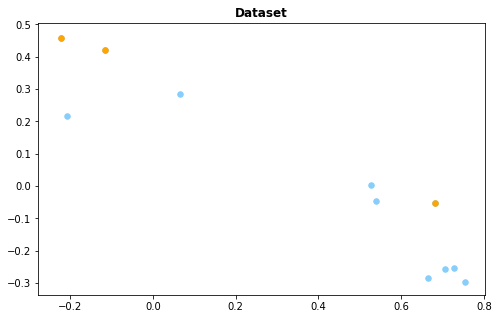

In [31]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(len(P)):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='orange', s=30, zorder=10)
    
plt.show()

In [48]:
def kmeansPP(P, k):
    P_minus_S = [p for p in P] #O(P)
    idx_rnd = random.randint(0, len(P)-1) #O(1)
    S = [P_minus_S.pop(idx_rnd)] #O(1)
    related_center_idx = [idx_rnd for i in range(len(P))] #O(P) migliorabile
    dist_near_center = [Vectors.squared_distance(P[i], S[0]) for i in range(len(P))] #O(P)

    for i in range(k-1): #O(k)
        sum_dist_squared = sum([d for d in dist_near_center]) #O(P)
        probs = [d / sum_dist_squared for d in dist_near_center] #O(P)
        
        cdf = [sum(probs[:i+1]) for i in range(len(P))] #O(P) transform to cdf
        coin = random.random() #O(1)
        new_center_idx = np.argmin([abs(cdf[j]-coin) for j in range(len(P))]) # argmin operation O(P)
        
        # Append the New Center
        S.append(P[new_center_idx]) #O(1)
        P_minus_S.remove(P[new_center_idx]) #O(1)
        
        # Update the Distances and the Clusters
        for j in range(len(P)): #O(P)
            if j != new_center_idx: #O(1)
                dist = Vectors.squared_distance(P[j], S[-1]) #O(1)
                if dist < dist_near_center[j]: #O(1)
                    dist_near_center[j] = dist #O(1)
                    related_center_idx[j] = new_center_idx #O(1)
            else:
                dist_near_center[j] = 0 #O(1)
                related_center_idx[j] = new_center_idx #O(1)
                
    return S

In [49]:
centers = kmeansPP(vector_list, 3)

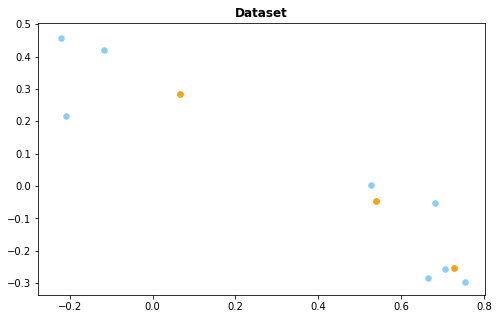

In [50]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(len(P)):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='orange', s=30, zorder=10)
    
plt.show()